# Document Clustering  
This notebook uses several unsupervised techniques to cluster documents.  

# Imports

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.axes._axes import _log as matplotlib_axes_logger
from scipy.cluster.hierarchy import dendrogram, ward, linkage
from sklearn.manifold import TSNE
from sklearn.cluster import KMeans
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from yellowbrick.text import TSNEVisualizer

%load_ext blackcellmagic

/Users/jasonadam/.local/share/virtualenvs/news-nlp-unJIfvp2/lib/python3.7/site-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.metrics.classification module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.metrics. Anything that cannot be imported from sklearn.metrics is now part of the private API.
  warnings.warn(message, FutureWarning)


In [2]:
# Set Global Variables & Remove Matplotlib warnings
RANDOM_SEED = 86
matplotlib_axes_logger.setLevel("ERROR")

In [3]:
# Import corpus & vectorized representations
cleaned_corpus_df = pd.read_csv("data/news_corpus.csv")
word_vec_df = pd.read_csv("data/count_term_doc_matrix.csv")
tfidf_df = pd.read_csv("data/tfidf_term_doc_matrix.csv")
embd_50_df = pd.read_csv("data/embeddings_50_dim.csv")

In [4]:
# take top 5 classes
cleaned_corpus_df = cleaned_corpus_df.loc[cleaned_corpus_df.publication.isin(["Breitbart", "New York Post", "Washington Post", "CNN", "Fox"])]
cleaned_corpus_df.drop(labels=["Unnamed: 0"], inplace=True, axis=1)
cleaned_corpus_df.dropna(subset=["c_content"], inplace=True)
cleaned_corpus_df.reset_index(inplace=True)
cleaned_corpus_df.shape

(63873, 10)

In [5]:
# Review imports
print(word_vec_df.shape)
print(tfidf_df.shape)
print(embd_50_df.shape)

(37800, 5001)
(44711, 5001)
(44711, 51)


In [6]:
# Set labels
y_labels = cleaned_corpus_df["publication"]

### Transpose Count & TF-IDF Vectorized DataFrame

In [7]:
# Transpose data frame --> Words as rows, documents as columns
wvT = word_vec_df.T
tfidfT = tfidf_df.T

# t-SNE (Documents)  

### Word Count Vectorized Corpus

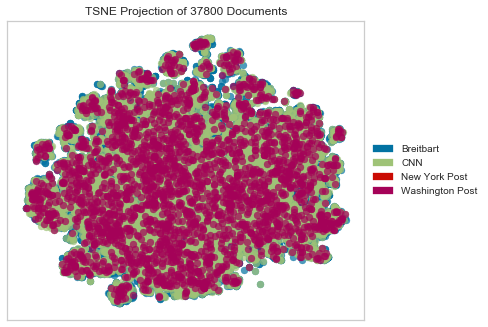

In [8]:
tsne_wv = TSNEVisualizer(random_state=RANDOM_SEED)
tsne_wv.fit(word_vec_df.iloc[:, 1:], cleaned_corpus_df["publication"])
tsne_wv.show()

### TF-IDF Vectorized Corpus

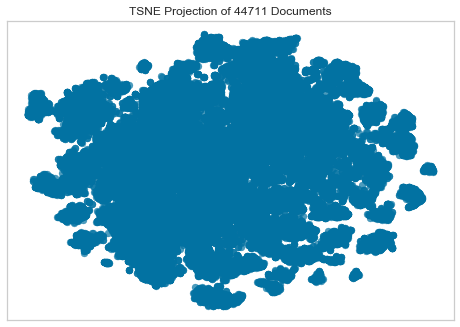

In [9]:
tsne_tfidf = TSNEVisualizer(random_state=RANDOM_SEED)
tsne_tfidf.fit(tfidf_df.iloc[:, 1:]) 
tsne_tfidf.show()

### Doc2Vec Embeddings (50 Dimensions)

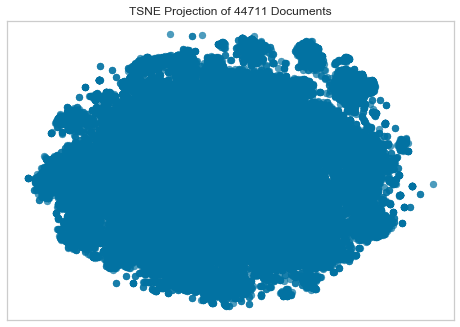

In [10]:
tsne_50embd = TSNEVisualizer(decompose_by=40, random_state=RANDOM_SEED)
tsne_50embd.fit(embd_50_df.iloc[:, 1:])
tsne_50embd.show()

# K-Means Clustering  

### TF-IDF

In [12]:
# K-means clustering on document by term matrix
clusters_tfidf = KMeans(n_clusters=3, random_state=RANDOM_SEED)
clusters_tfidf.fit(tfidf_df.iloc[:, 1:])

cl_tfidf_labels = ["cluster_{}".format(c) for c in clusters_tfidf.labels_]
len(cl_tfidf_labels)

44711

In [14]:
# Add cluster labels to df
tfidf_df["kMean_cluster"] = cl_tfidf_labels

# Create filter lists to see documents
cl_0 = tfidf_df.loc[tfidf_df.kMean_cluster == "cluster_0"]["id"].tolist()
cl_1 = tfidf_df.loc[tfidf_df.kMean_cluster == "cluster_1"]["id"].tolist()
cl_2 = tfidf_df.loc[tfidf_df.kMean_cluster == "cluster_2"]["id"].tolist()

#### First Cluster

In [34]:
# Sample Docs
cleaned_corpus_df.loc[cleaned_corpus_df.id.isin(cl_0)]["content"][0]

'On Tuesday’s broadcast of CNN’s “Situation Room,” CNN Senior Washington Correspondent Jeff Zeleny stated that Chelsea Manning’s transition from a man to a woman “certainly played into” President Obama’s decision to commute Manning’s sentence, and “Without that, it’s hard to imagine, I think, this president would have done that. ”  Zeleny said, “I think a question that this president the White House will have to answer here  —   will answer, and I think it’s an important one, if  —   how much was the personal story of Chelsea Manning involved in this, because the outcry from the left was so strong on this. And she’s having a difficult time in federal prison, no question. But, to me, that is a central question here. Without that, you have to wonder if the outcome would be the same. I think it might not be. ” He added, “[B]ecause she transitioned from a man to a woman, I think all of that certainly played into this. Without that, it’s hard to imagine, I think, this president would have d

In [33]:
cleaned_corpus_df.loc[cleaned_corpus_df.id.isin(cl_0)]["content"][2]

'  “honour crimes” have risen by 40 per cent in five years in London, with the number of forced marriages doubling in the same period. [According to the figures, obtained by the Evening Standard, some of the children involved in the abuse were younger than   .  Since 2012, honour crimes reported to the Metropolitan Police rose to 1, 081 and those relating to forced marriages shot up to 367. Women and girls were the victims in the vast majority of reported incidents, with over half coming from “Asian” backgrounds, the paper reports. Knives and guns were involved in more than 70 incidents, and dozens of rapes and other sexual crimes were reported. Detective Chief Inspector Sam Faulkner, of the Met’s Community Safety Unit, said the crimes stem from communities using “cultural   religious justifications for male violence against women and girls and other people”. They were often based on traditions whereby “an individual, family and community’s honour is weighted on women and girls” he sai

In [35]:
# Sample article titles
cleaned_corpus_df.loc[cleaned_corpus_df.id.isin(cl_0)][["title"]].head()

,title
0,CNN’s Zeleny: ’Hard to Imagine’ Obama Would Ha...
1,American Students on Spring Break Chant ’Build...
2,Surge in ’Honour Crimes’ and Forced Marriages ...
3,MILO Announces New Media Venture - Breitbart
5,Watch: The Resistance Creates Anti-Trump Aerob...


In [18]:
# Pivot by publication -> similar to distribution in full training set
cleaned_corpus_df.loc[cleaned_corpus_df.id.isin(cl_0)].groupby(["publication"]).agg(
    publication_cnt=pd.NamedAgg("publication", "count")
)

,publication_cnt
publication,
Breitbart,10564
CNN,6024
New York Post,10957
Washington Post,4539


#### Second Cluster

In [39]:
cleaned_corpus_df.loc[cleaned_corpus_df.id.isin(cl_1)].head()

,index,id,title,publication,author,date,year,month,content,c_content
9,7812,26548,Drug Stocks Drop as Trump Backs Price Bidding,Breitbart,Dr. Susan Berry,2017-01-11,2017.0,1.0,Drug stocks plummeted as Donald Trump announ...,drug stocks plummeted donald trump announced w...
12,7815,26551,James Cameron Slams Trump’s Administration: ‘T...,Breitbart,Jerome Hudson,2017-01-30,2017.0,1.0,Film director and climate change activist Jame...,film director climate change activist james ca...
14,7817,26553,NYT: Immigration Hard-Liners Rising in Trump A...,Breitbart,Breitbart News,2017-04-24,2017.0,4.0,Advocates who want America’s immigration laws ...,advocates want america immigration laws enforc...
16,7819,26555,Trump Celebrates America’s Faith-Based Foundat...,Breitbart,Charlie Spiering,2017-02-02,2017.0,2.0,President Donald Trump praised America’s val...,president donald trump praised america values ...
21,7824,26560,’SNL’ Star Michael Che Not Sorry for Calling B...,Breitbart,Jerome Hudson,2017-03-26,2017.0,3.0,Saturday Night Live star Michael Che is not ap...,saturday night live star michael che apologizi...


In [40]:
cleaned_corpus_df.loc[cleaned_corpus_df.id.isin(cl_1)].tail()

,index,id,title,publication,author,date,year,month,content,c_content
63781,137605,145444,Christie apparently softened Trump’s stance on...,New York Post,Daniel Halper,2016-08-26,2016.0,8.0,Credit Chris Christie for Donald Trump’s shift...,credit chris christie donald trump shift away ...
63783,137607,145449,Why is ‘the Republican Obama’ an insult?,New York Post,Jonah Goldberg,2016-02-05,2016.0,2.0,“The Republican Obama. ” That’s the new hot at...,republican obama new hot attack sen marco rubi...
63802,137626,145472,Former ‘Apprentice’ contestant says Donald Tru...,New York Post,Yaron Steinbuch and Gabrielle Fonrouge,2016-10-14,2016.0,10.0,Two more women — including a former contest...,two women including former contestant apprenti...
63847,137671,145532,Stumped by Trump’s success? Take a drive outsi...,New York Post,Salena Zito,2016-08-22,2016.0,8.0,"If you drive anywhere in Pennsylvania, from th...",drive anywhere pennsylvania turnpike old us ro...
63856,137680,145543,Here’s Donald Trump’s response to being called...,New York Post,Chris Perez,2016-10-13,2016.0,10.0,Donald Trump jokingly admitted to being a “sex...,donald trump jokingly admitted sexual predator...


#### Third Cluster

In [41]:
cleaned_corpus_df.loc[cleaned_corpus_df.id.isin(cl_2)].head()

,index,id,title,publication,author,date,year,month,content,c_content
44,7847,26583,"Monica Lewinsky, Clinton Sex Scandal Set for ’...",Breitbart,Jerome Hudson,2017-04-11,2017.0,4.0,"Screenwriter Ryan Murphy, who has produced the...",screenwriter ryan murphy produced fx series am...
162,7965,26701,Report: Ex-Baylor President Ken Starr Looking ...,Breitbart,Warner Todd Huston,2017-02-10,2017.0,2.0,"Ken Starr, who until just last year was presid...",ken starr last year president baylor universit...
240,8043,26779,White House: FBI Leaks ‘One of Many’ Reasons W...,Breitbart,Charlie Spiering,2017-05-10,2017.0,5.0,White House deputy press secretary Sarah Sande...,white house deputy press secretary sarah sande...
284,8087,26823,Tripp - If I Had Leaked To Drudge Clinton Migh...,Breitbart,Aaron Klein,2017-02-28,2017.0,2.0,"During a radio interview, Linda Tripp, once th...",radio interview linda tripp chief cooperating ...
288,8091,26827,CNN Cuts Feed After Senator Objects to Clinton...,Breitbart,Joel B. Pollak,2017-06-13,2017.0,6.0,CNN cut away from a Senate Judiciary Committee...,cnn cut away senate judiciary committee hearin...


In [42]:
cleaned_corpus_df.loc[cleaned_corpus_df.id.isin(cl_2)].tail()

,index,id,title,publication,author,date,year,month,content,c_content
63777,137601,145440,Hillary apologists’ response to collapse is de...,New York Post,Karol Markowicz,2016-09-12,2016.0,9.0,Hillary Clinton is sick. This should’ve been o...,hillary clinton sick obvious came head sunday ...
63789,137613,145455,Hillary Clinton releases tax returns,New York Post,Daniel Halper,2016-08-12,2016.0,8.0,"Bill and Hillary Clinton made $10, 594, 529 in...",bill hillary clinton made adjusted gross incom...
63807,137631,145477,Clinton team avoided ER to conceal details of ...,New York Post,"Yoav Gonen, Shawn Cohen, Tina Moore and Bruce ...",2016-09-12,2016.0,9.0,was headed to an emergency room followi...,headed emergency room following detoured daugh...
63846,137670,145531,Colin Powell: Bill Clinton ‘still d—ing bimbos...,New York Post,"Daniel Halper, Carl Campanile and Bob Fredericks",2016-09-14,2016.0,9.0,Colin Powell wrote in a that he doesn’t wa...,colin powell wrote want vote pal hillary clint...
63853,137677,145539,Clinton regrets calling half of Trump supporte...,New York Post,Mary Kay Linge and Aaron Short,2016-09-10,2016.0,9.0,Hillary Clinton apologized Saturday for callin...,hillary clinton apologized saturday calling do...


#### Hierarchical Clustering

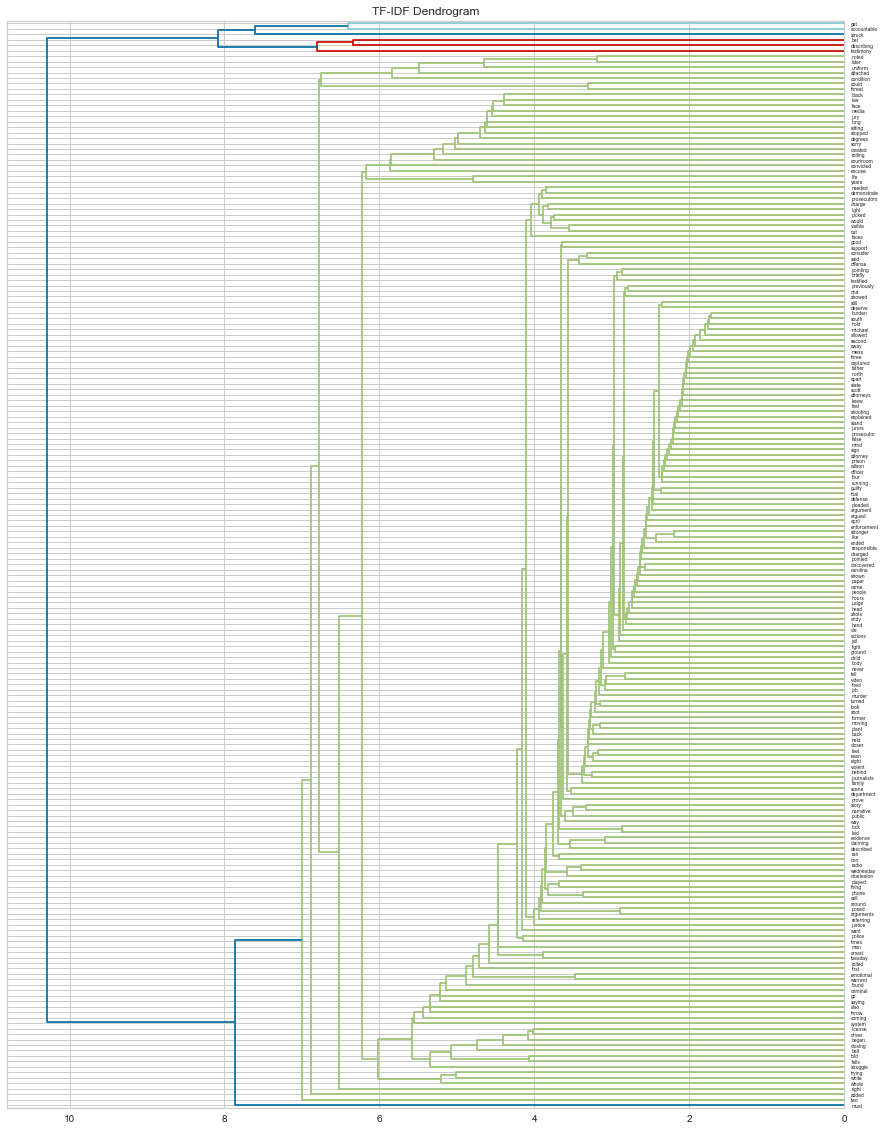

In [47]:
plt.figure(figsize=(15, 20))
plt.title("TF-IDF Dendrogram")
dend = dendrogram(
    linkage(tfidfT.iloc[1:200, :].values, method="ward"),
    orientation="left",
    labels=tfidfT.index[1:200],
)
plt.savefig("imgs/tfidf_dendrogram.png")

# t-SNE (Words)  

#### Word Count Vector

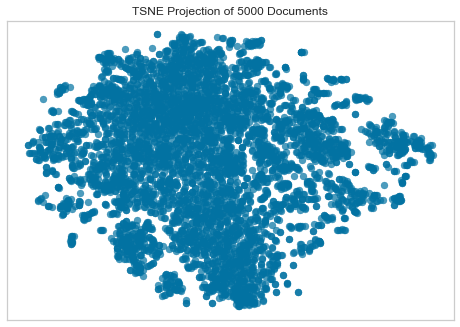

In [48]:
tsne_wv = TSNEVisualizer(random_state=RANDOM_SEED)
tsne_wv.fit(wvT.iloc[1:, :])
tsne_wv.show()

#### TF-IDF Vector

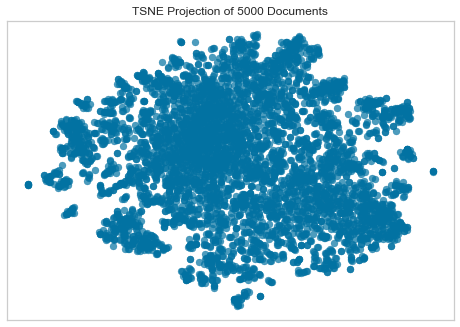

In [49]:
tsne_wv = TSNEVisualizer(random_state=RANDOM_SEED)
tsne_wv.fit(tfidfT.iloc[1:, :])
tsne_wv.show()